# 2. Modelos de distribución multivariados
## 2.1. Funciones de distribución y densidad

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---


## 2.1.0. Preliminares

Referencia: [Capítulo 6 de Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)

---

### Variables aleatorias

Suponer que $X$ representa una cantidad desconocida de interés, como la temperatura de una máquina. Si los valores de $X$ son desconocidos o cambian, decimos que $X$ es una variable aleatoria, o **VA**. El conjunto de todos los valores *posibles* se denota como $\mathcal{X}$, llamado espacio muestral o espacio de estados. Un evento es un *sub*conjunto de valores del espacio muestral. Por ejemplo, si $\mathcal{X}$ es el lado de un dado al ser lanzado, $\mathcal{X} = \{ 1, 2, 3, 4, 5, 6 \}$, el evento "cae 1" se denota $X = 1$, y "ver un número impar" se denota $X \in \{ 1, 3, 4\}$, el evento "cae entre 4 y 6" como $4 \leq X \leq 6$.

**Nota**: no confundir el espacio muestral $\mathcal{X}$ con la VA $X$. En el segundo caso, la VA toma valores numéricos, es una función de los elementos de $\mathcal{X}$ que mapea de $\mathcal{X}$ al conjunto de los reales o naturales. $\mathcal{X}$ puede o no consistir en valores numéricos. Por ejemplo, si  el espacio muestral $\mathcal{X}$ son los posibles resultados de lanzar dos monedas tenemos $\mathcal{X}=\{HH, HT, TT\}$. Al evento "cantidad de veces que sale caras, o $H$", la variable $X$ mapea de $\mathcal{X}$ tres posibles resultados: $X(HH)=2, X(HT)=1, H(TT)=0$.

---

## 2.1.1. Variables aleatorias y sus distribuciones
### VA discretas

Si $\mathcal{X}$ es finito o contable infinito (cada miembro de $\mathcal{X}$ puede asociarse con un elemento de $\mathbb{N}$), entonces $X$ es una variable aleatoria *discreta*. En este caso, denotamos la probabilidad de un evento que $X$ toma como $\text{Pr}(X=x)$. Definimos la **función de masa de probabilidad** ($\text{\sf pmf}$ en inglés) como la función que computa la probabilidad de cada valor de la VA

$$
  p(x) \overset{\Delta}{=} \text{Pr}(X = x)
$$

$p(x)$ satisface $0\leq p(x) \leq 1$ y $\sum_{x\in \mathcal{X}} p(x) = 1$. 

Podemos imaginarnos la distribución de probabilidad de muchas variables aleatorias como el llenado de un arreglo multidimensional. Por ejemplo, en la siguiente imagen (MML-6.2)

<p align="center">
  <img src="img/rv_array.png" width='40%' />
</p>

muestra dos variables aleatorias bivariadas, $X$ (que puede tomar valores $x_i, i = 1, 2, \dots, M$) y $Y$ (que puede tomar valores $j=1, 2, \dots, L$). La probabilidad (*conjunta*) de que $X=x, Y=y$ se define como

$$
  p(x, y) \overset{\Delta}{=} \text{Pr}(X = x, Y = y)
$$

$p(x, y)$ se lee "la probabilidad de $x$ y $y$", en ocasiones escrito usando notación de teoría de conjuntos como $p(x \cap y)$. Cada entrada (cada celda) en la tabla se calcula contando la cantidad de casos que $(x_i,y_j)$ suceden conjuntamente

$$
\text{Pr}(X = x_i, Y = y_i) = \frac{n_{ij}}{N} \tag{1}
$$

En la tabla, si contamos todos los casos de la fila $j$ tenemos la cantidad total de veces que $y_j$ sucede, y lo llamamos $r_j$. Si contamos la columna $i$ tenemos la cantidad total de veces que $x_i$ sucede, y que llamamos $c_i$.

La *probabilidad marginal* de $x$, es decir, la probabilidad que $X=x$ sin importar el valor de $Y$ se escribe como $p(x)$ y se calcula como sigue

$$
  p(X = x_i) = p(x_i) = \frac{c_i}{N} \tag{2}
$$

El número de casos en la columna $i$ es la suma de casos en cada celda *en esa columna*, por lo que $c_i = \sum_j n_{ij}$ (dejando fija $i$). Por lo tanto, 

$$
  p(x_i) = \sum_{j=1}^Lp(x_i, y_j) \tag{3}
$$

A la ecuación (3) se le conoce como la *regla de la suma*. Notar que se fija la columna $i$ y se itera sobre las filas $j=1, 2, 3$, por lo que por cada columna $i$ tenemos una probabilidad $p(x_i)$.

Si consideramos los casos en los que $X=x_i$, la *fracción* de casos en los que $Y=y_j$ se escribe como $p(Y=y_j | X=x_i)$, probabilidad que es conocida como *probabilidad condicional* de $Y=yj$ *dado* que $X=x_i$. Se obtiene encontrando la fracción de puntos en una columna $i$ que caen en una celda $(i,j)$ dada

$$
  p(y_j | x_i) = \frac{n_{ij}}{c_i} \tag{4}
$$

Notar que $c_i$ es la cantidad total de valores para los cuales $X=x_i$, y $n_{ij}$ es una celda particular. Con las ecuaciones (1), (2) y (3) podemos derivar la siguiente relación:

$$
  \begin{align*}
    p(x_i, y_i) &=  \frac{n_{ij}}{N} =  \frac{n_{ij}}{c_i} \frac{c_i}{N}\\
                &= p(y_j | x_i)p(x_i) \tag{5}
  \end{align*}
$$

La ecuación (5) es conocida como *regla del producto*.

Eliminando la notación excesiva, podemos sintetizar las dos reglas como sigue

$$
  \begin{align*}
    \text{ \bf{regla de la suma}}\quad\quad   &p(x) = \sum_{y}p(x,y) \\
    \text{ \bf{regla del producto}}\quad\quad &p(x, y) = p(y|x)p(x) 
  \end{align*}
$$

<!-- <p align="center">
  <img src="img/regla_sum_prod2.png" width='50%' />
</p> -->

Considerando la simetría $p(x,y) = p(y,x)$ y que $p(y,x) = p(x|y)p(y)$, encontramos la siguiente relación

$$
 \begin{align*}
  p(y|x)p(x) &=  p(x|y)p(y)\\
  p(y|x)     &=  \frac{ p(x|y)p(y)}{p(x)}
 \end{align*} \tag{6}
$$

La ecuación (6) es llamada *Teorema de Bayes*, y tiene una importancia en ML y estadística que no puede ser exagerada. 

---

#### Muestreando de una distribución conjunta

Crearemos un data frame que contenga posibles valores de $X$ y $Y$, así como sus frecuencias de ocurrencia. Después, usando la función `slice_sample()` del paquete `{dplyr}` tomaremos una muestra aleatoria. Básicamente, lo que hace `slice_sample()` es tomar filas (*slices*) del data frame original, solo que en este caso permitiremos que cada fila pueda ser seleccionada más de una vez. La cantidad de veces que cada fila puede ser seleccionada será, aproximadamente, `wgts/sum(wgts) * n`.

In [ ]:
library(tidyverse)
library(kableExtra)
library(IRdisplay)
# crear distribución conjunta {X,Y}
data_for_sampling <- data.frame(
  Y = rep(0:3, times = 3),
  X = rep(0:2, each = 4)
)
data_for_sampling <- data_for_sampling |>
  mutate(wgts = c(0, 3, 9, 3, 2, 18, 18, 2, 3, 9, 3, 0))
# tomar una muestra aleatoria de la dist conjunta X,Y, usando wgts como pesos,
# o frecuencia relativa de cada celda.
set.seed(452) # para reproducibilidad
sampled_data <- data_for_sampling |>
  slice_sample(
    n = 10000, # 10k muestras
    replace = TRUE, # con reemplazo
    weight_by = data_for_sampling$wgts # pesos relativos de cada celda
  )
# crear una tabla de frecuencia
table(sampled_data[, c(1, 2)]) |>
  as.data.frame.matrix() |>
  rownames_to_column("Y/X") |>
  kbl() |>
  kable_classic_2(full_width = F) |>
  kable_styling() |>
  as.character() |>
  display_html()

Y/X,0,1,2
0,0,325,400
1,439,2544,1351
2,1273,2524,418
3,433,293,0


De acuerdo con la tabla anterior, ¿cuál es la probabilidad $p(y=0, x=1)$?

In [ ]:
xt <- table(sampled_data[, c(1, 2)]) |>
  as.data.frame.matrix()
# obtener la distribución conjunta de cada celda usando la eq 1
xt_prob <- (xt / sum(xt))
# colorear la celda que corresponde a y=0 x=1
xt_prob[1, 2] <- cell_spec(xt_prob[1, 2], background = "red", color = "black")
# imprimir la tabla
xt_prob |>
  kbl(escape = FALSE, booktabs = TRUE) |>
  kable_classic_2(full_width = F) |>
  kable_styling() |>
  as.character() |>
  display_html()

,0,1,2
0,0.0000,0.0325,0.0400
1,0.0439,0.2544,0.1351
2,0.1273,0.2524,0.0418
3,0.0433,0.0293,0.0000


La celda en rojo corresponde a la probabilidad

$$
  p(y=0, x=1) = \frac{325}{10000}
$$

Ahora, para calcular la probabilidad condicional $p(x=1|y=0)$ debemos obtener la probabilidad marginal de $y$, o $p(y)$.

In [ ]:
library(glue)
xt_py <- xt |>
  mutate(
    'p(y)' = glue("{rowSums(xt)}/{sum(xt)}={rowSums(xt)/sum(xt)}")
  )
xt_py |>
  kbl(escape = FALSE, booktabs = TRUE) |>
  kable_classic_2(full_width = F) |>
  kable_styling() |>
  column_spec(5, color = "black", background = "#d4d1d1") |>
  as.character() |>
  display_html()

,0,1,2,p(y)
0,0,325,400,725/10000=0.0725
1,439,2544,1351,4334/10000=0.4334
2,1273,2524,418,4215/10000=0.4215
3,433,293,0,726/10000=0.0726


 Luego, la probabilidad condicional será la probabilidad conjunta $p(y=0, x=1)$ dividida por la probabilidad marginal $p(y=0)$

$$
  p(x=1|y=0) = \frac{p(y=0,x=1)}{p(x=1)} = \frac{325/10000}{725/10000} = \frac{13}{29}
$$

En general, la distribución condicional $p(x | y=0)$ se puede obtener como sigue

In [ ]:
sampled_data |>
  # filtrar la fila
  filter(Y == 0) |>
  # contar los casos de X condicionales a y=0; crea columna n
  count(X) |>
  # obtener la funcion de masa
  mutate('p(x|y=0)' = n/sum(n)) |>
  kbl(escape = FALSE, booktabs = TRUE) |>
  kable_classic_2(full_width = F) |>
  kable_styling() |>
  as.character() |>
  display_html()

X,n,p(x|y=0)
1,325,0.4482759
2,400,0.5517241


La distribución condicional de $x|y=y$ puede verse totalmente diferente que la distribución marginal $p(x)$. En la siguiente imagen, tomada de Bishop (PRML-1.1), se ilustra la distribución de dos variables $X$ y $Y$. $X$ puede tomar 9 valores posibles, y $Y$ 2. La distribución marginal de $X$, la distribución independientemente de qué valores tome $Y$, tiene una forma más achatada (más amplia, con mayor varianza) que la distribución condicional a $Y=1$.

<p align="center">
  <img src="img/marginal_conditional.png" width='60%' />
</p>


#### VA continuas

Si $X\in \mathbb{R}$ es una función real, se denomina *variable aleatoria continua*, y es más natural especificar que $X$ se encuentre en un intervalo, e.g,, $a \leq X \leq b$, dado que en este caso no se puede crear un conjunto *contable* de valores posibles que $X$ puede tomar, pero podemos crear un conjunto finito de *intervalos* en la linea real, y asociar los eventos de $X$ que están en esos intervalos.

##### Distribución acumulada (cdf)

Sea $A = (X \leq a)$, $B = (X \leq b)$ y $C = (a < X \leq b)$ en donde $a < b$. Tenemos que $B$ es la unión de $A$ y $C$, es decir, $B$ toma todos los valores que toman $A$ y $C$. Dado que $A$ y $C$ son mutuamente excluyentes, la probabilidad de $B$ es

$$\text{Pr}(B) = \text{Pr}(A) + \text{Pr}(C) \tag{7} $$

Y la probabilidad de estar en el intervalo $C$ como

$$
  \text{Pr}(C) = \text{Pr}(B) - \text{Pr}(A) \tag{8}
$$

Definimos la distribución de probabilidad acumulada como 

$$
   P(x) \overset{\Delta}{=} \text{Pr}(X \leq x)
$$

Con esto, podemos calcular la probabilidad de estar en un intervalo como

$$
  \text{Pr}(a < X \leq b) = P(b) - P(a) \tag{9}
$$

En el siguiente gráfico se representa la función de probabilidad acumulada normal. 

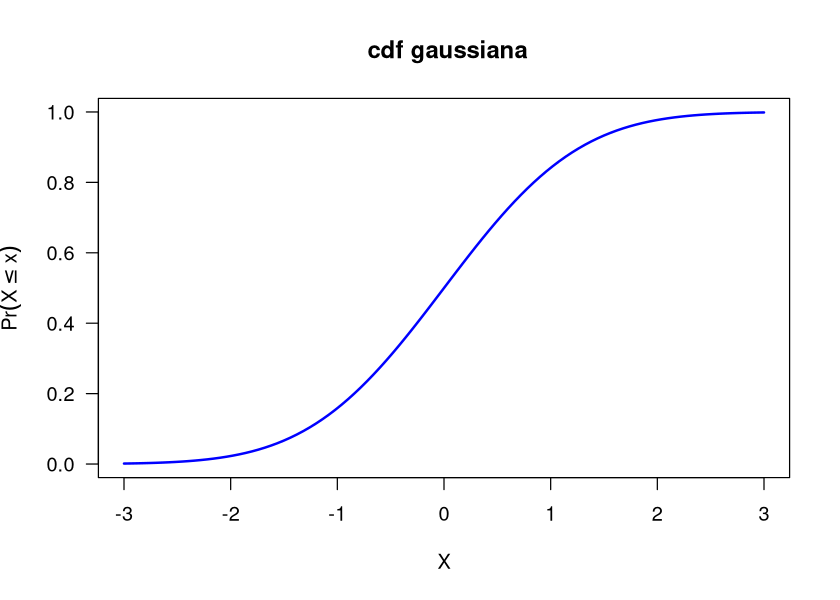

In [ ]:
par(las=1)
options(repr.plot.width=7, repr.plot.height=5)
curve(
  pnorm(x, mean = 0, sd = 1),
  from = -3, to = 3, main = " cdf gaussiana",
  xlab = 'X', ylab = expression(Pr(X <= x)),
  col = 'blue', lwd = 2
)

##### Función de densidad

Podemos definir la función de densidad de probabilidad, o *pdf*, como la derivada de la cdf

$$
  p(x) \overset{\Delta}{=} \frac{d}{dx}P(x)
$$

Y viceversa: la cdf como la integral de la pdf. Dada la pdf, podemos calcular la probabilidad de una variable continua en un intervalo finito como sigue

$$
  \text{Pr}(a <X\leq b) = \int_a^b p(x)dx = P(b) - P(a) \tag{10}
$$

Por ejemplo, en la siguiente figura a la izquierda se representa una variable aleatoria normal con media 0 y desviación estándar de 1, conocida como distribución normal estándar, y representada como $\mathcal{N}(\mu=0, \sigma = 1)$ o simplemente $\mathcal{N}(0, 1)$. Para la densidad de probabilidad normal, en R usamos `dnorm(x, mean, sd)`, que nos retorna la densidad en `x`.

A la derecha se representa el área equivalente en la cdf, usando `pnorm`.

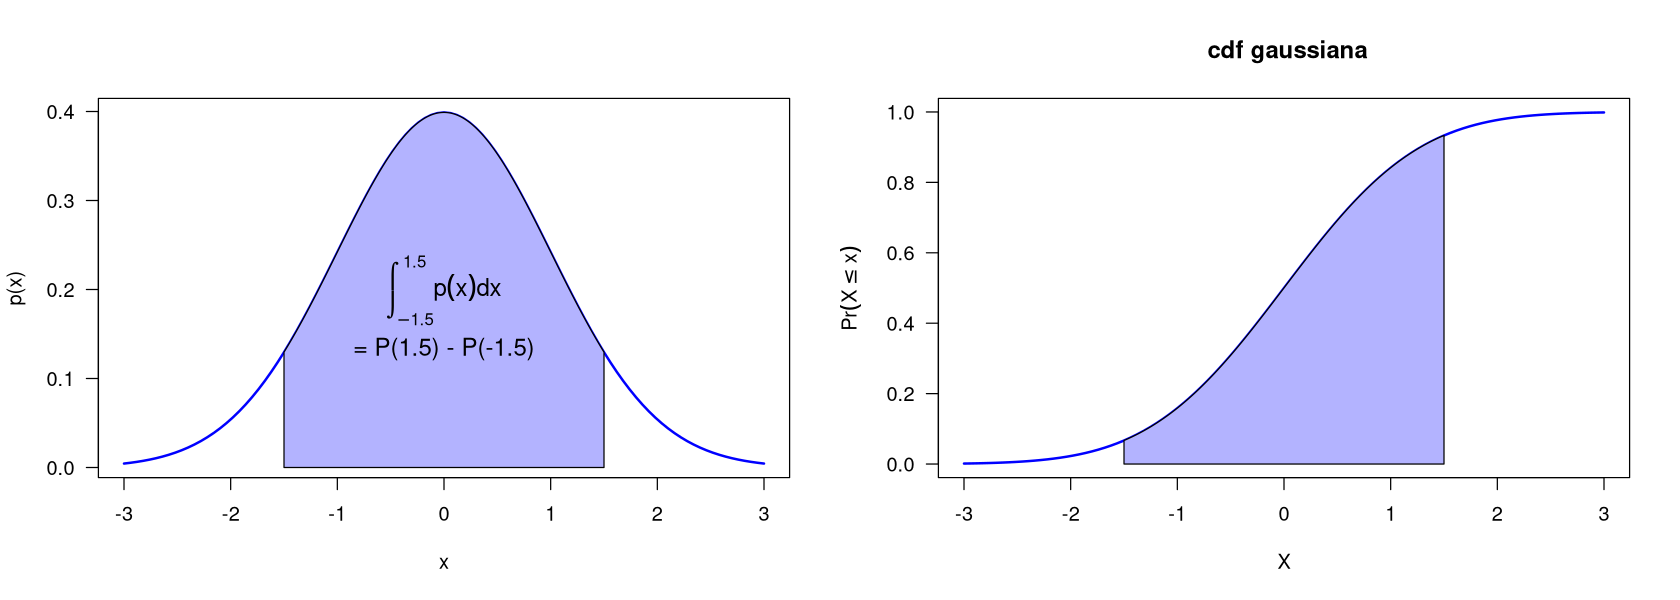

In [ ]:
options(repr.plot.width=7*2, repr.plot.height=5)
par(las = 1, mfrow = c(1, 2))
# graficar la curva usando la función de dnorm; curve crea in-situ 101 valores
# para x que van de from a to. Es idéntico a
# x <- seq(from, to, length = 101); plot(x, dnorm(x, 0, 1))
# figura a la izquierda, pdf
curve(
  dnorm(x, 0, 1),
  from = -3, to = 3,
  col = "blue",
  ylab = "p(x)",
  lwd = 2
)
from_x <- -1.5
to_x <- 1.5
# valores para x y y en el área sombreada
sx <- c(from_x, seq(from_x, to_x, 0.01), to_x)
sy <- c(0, dnorm(seq(from_x, to_x, 0.01)), 0)
# crear área sombreada con sx y sy
polygon(
  sx, sy,
  col = "#B3B3FF"
)
text(
  x = 0,
  y = dnorm(0, 0) / 2,
  labels = expression(integral(p(x) * dx, -1.5, 1.5)),
  cex = 1.2
)
text(
  x = 0,
  y = dnorm(0, 0) / 3,
  labels = "= P(1.5) - P(-1.5)",
  cex = 1.2
)

# figura a la derecha, cdf
curve(
  pnorm(x, mean = 0, sd = 1),
  from = -3, to = 3, main = " cdf gaussiana",
  xlab = 'X', ylab = expression(Pr(X <= x)),
  col = 'blue', lwd = 2
)
from_x <- -1.5 # en rigor, debería ser -Inf
to_x <- 1.5
sx  <- c(from_x, seq(from_x, to_x, 0.01), to_x)
sy  <- c(0, pnorm(seq(from_x, to_x, 0.01)), 0)
polygon(
  sx, sy,
  col = "#B3B3FF"
)

En `R`, la función de densidad acumulada ($\text{\sf cdf}$) para la distribución normal se obtiene con `pnorm(x, mean, sd)` en donde `x` es un vector de *cuantiles*, que es el, o los, valores en $x$ para el cual(es) deseamos obtener su probabilidad.

Para obtener el área sombreada en la anterior figura, usamos `pnorm(b) - pnorm(a)`

In [ ]:
pnorm(1.5, mean = 0, sd = 1) - pnorm(-1.5, 0, 1)
# mean = 0, sd = 1 están por defecto, pero los ponemos para mayor claridad

[1] 0.8663856

El área que cubre `pnorm(1.5)` va desde $-\infty$ a 1.5, y el área de `pnorm(-1.5)` va de $-\infty$ a -1.5.

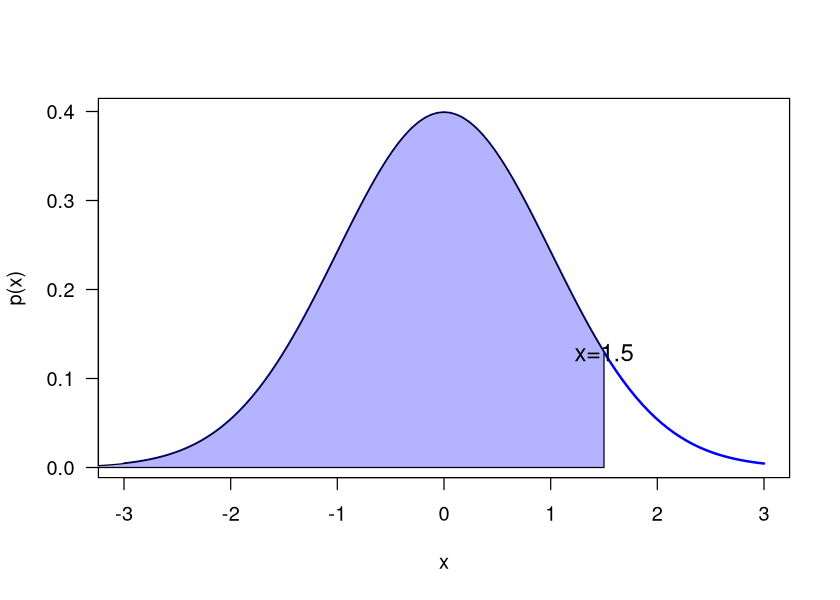

In [ ]:
options(repr.plot.width=7, repr.plot.height=5)
par(las = 1)
curve(
  dnorm(x, 0, 1),
  from = -3, to = 3,
  col = "blue",
  ylab = "p(x)",
  lwd = 2
)
from_x <- -10 # en rigor, debería ser -Inf
to_x <- 1.5
sx  <- c(from_x, seq(from_x, to_x, 0.01), to_x)
sy  <- c(0, dnorm(seq(from_x, to_x, 0.01)), 0)
polygon(
  sx, sy,
  col = "#B3B3FF"
)
text(
  x = 1.5,
  y = dnorm(1.5, 0),
  labels = 'x=1.5',
  cex = 1.2
)

En contraste con las **VA** discretas, la probabilidad de que una variable continua $X\in \mathbb{R}$ tome un valor particular, $p(X = x)$, es 0. Es como integrar la función de densidad de la siguiente manera:

$$
  p(a \leq X \leq a) = \int_a^b p(x)dx = P(a) - P(a)
$$

Por esta razón, con $\text{\sf pdf}$ solo calculamos probabilidades en intervalos.

---

Para VA continuas, las reglas de suma y producto son

$$
  \begin{align*}
    \text{ \bf{regla de la suma}}  \quad\quad   &p(x) = \int_y p(x,y) \\
    \text{ \bf{regla del producto}}\quad\quad &p(x, y) = p(y|x)p(x) 
  \end{align*}
$$

## Ejercicios de tarea

Entregar en formato de RMarkdown (o PDF renderizado). Una plantilla para RMarkdown se puede encontrar [aquí](https://github.com/jealcalat/Analisis_multivariado/tree/main/R_tutorials/rmarkdown_plantilla.Rmd). Renderizada en PDF se verá [así](https://github.com/jealcalat/Analisis_multivariado/blob/main/R_tutorials/rmarkdown_plantilla.pdf).

### Leyes de probabilidad

Supongamos lo siguiente:

Un 5% de la población son mujeres (M) con estudios universitarios completos (U). Las mujeres representan un 55% de la población. Un 20% de la población tiene estudios universitarios completos

1. ¿Cuál es la probabilidad de que una mujer tenga estudios universitarios completos? Hint: calcular $p(U \mid M)$.
2. ¿Cuál es la probabilidad de que una mujer tenga estudios universitarios completos? Hint: calcular $p(M \min U)$
3. ¿Cuál es la probabilidad de que una persona con estudios universitarios completos sea hombre (H)? Hint: necesitamos el complemento de 2). 
### VA discretas

La $\text{\sf pmf}$ de una distribución de probabilidad discreta de Poisson permite calcular la probabilidad un número dado de eventos en un intervalo, dada una tasa de ocurrencia $\lambda$. Por ejemplo, ¿cuál es la probabilidad de que ocurran 3 choques en un día en López Mateos si la tasa de ocurrencia es de 2 choques por día? Con la $\text{\sf pmf}$ 

$$
  p(x \mid \lambda) = \frac{e^{-\lambda} \lambda^{x}}{x!} \tag{11}
$$

Sería 

$$
  p(3 \mid 2) = \frac{e^{-2} \lambda^{3}}{3!}.
$$

En `R`

[1] 0.180447

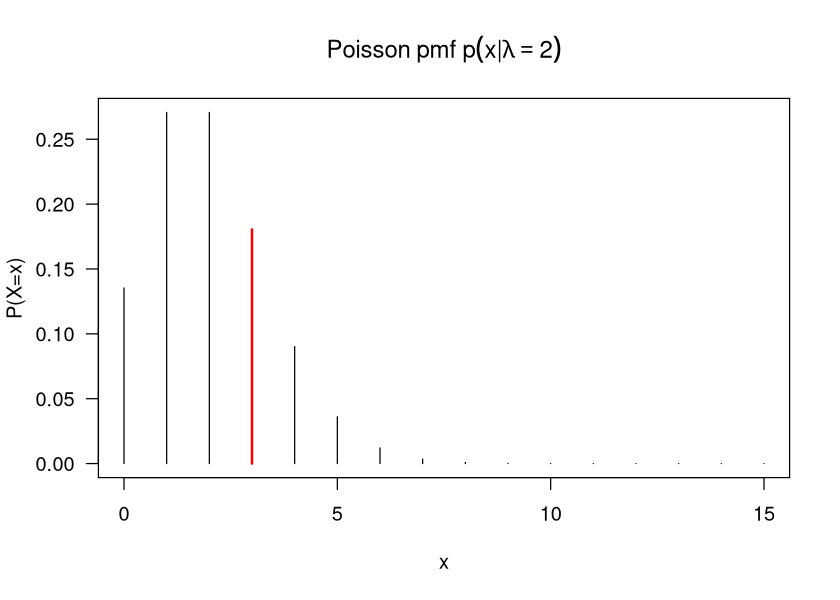

In [ ]:
# creamos una función para la eq 11
pmf_poisson <- function(x, l) (exp(-l) * l^x) / (factorial(x))
x <- 3
l <- 2
pmf_poisson(x = x, l = l)
# R tiene una función por defecto más eficiente que calcula esto
# dpois(x = x, lambda = l)

# graficamente
par(las=1)
xp <- seq(0, 15, 1)
plot(
  xp,
  pmf_poisson(xp, l),
  type = "h",
  ylab = "P(X=x)",
  xlab = 'x',
  main = expression(Poisson~pmf~p(x*'|'*lambda==2))
)
segments(
  x0 = 3,
  x1 = 3,
  y0 = 0,
  y1 = pmf_poisson(x = x, l = l),
  col = 'red',
  lwd = 2
)

Encontrar las probabilidades siguientes

1. $p(x=3 \mid \lambda = 3/4) = ?$
2. $p(0 \leq x \leq 10 \mid \lambda = 3) = ?$  

### VA continuas

La pdf de la distribución normal con media $\mu$ y desviación estándar $\sigma$ (o varianza $\sigma^2$) es caracterizada por

$$
  p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}} \tag{12}
$$

1. Suponer que un manufacturador de un tipo de botana sabe que el peso total del paquete de botana está distribuido normalmente con una media de 80.2 gramos y una desviación estándar de 1.1 ramos. ¿Cuál es la probabilidad de que un paquete de botana pese menos de 78 gramos?
2. Bajo las mismas asunciones anteriores, ¿cuál es la probabilidad de que un paquete dado tenga un peso que esté entre 2 desviaciones estándar de la media? Es decir,  $p(x \in [\mu - \sigma, \mu + \sigma])$.
3. Grafica el área de la pdf que se cubriría en el ejercicio 2.